# Comparando, Tratando e Mesclando/Integrando DataFrames

## Objetivo

Vamos modificar os IDs para os nomes dos produtos, dos clientes e das lojas, para nossas análises ficarem mais intuitivas futuramente. Para isso, vamos criar um data frame com todos os detalhes.

- Usaremos o método merge para isso e, depois se quisermos, podemos pegar apenas as colunas que queremos do dataframe final.

### Criando nossos dataframes

In [31]:
#importando biblioteca pandas
import pandas as pd
#importando biblioteca para ler characteres diferentes 
import chardet

#importando biblioteca para criação de gráficos e visualizações de dados
import matplotlib.pyplot as plt


In [ ]:
with open("Contoso - Cadastro Produtos.csv", "rb") as f:
    result = chardet.detect(f.read(100000))  # Analisa parte do arquivo
    encoding_detected = result['encoding']

print(f"Codificação detectada: {encoding_detected}")

# Agora, tentar abrir o arquivo com a codificação correta
cadastro = pd.read_csv("Contoso - Cadastro Produtos.csv",sep=';', encoding=encoding_detected)
cadastro

In [5]:

#às vezes precisaremos mudar o encoding. Possiveis valores para testar:
#encoding='latin1', encoding='ISO-8859-1', encoding='utf-8', encoding='cp1252'
#lendo cada arquivo csv da pasta
vendas_df = pd.read_csv('Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv("Contoso - Cadastro Produtos.csv",sep=';', encoding=encoding_detected)
lojas_df = pd.read_csv('Contoso - Lojas.csv',sep=';', encoding=encoding_detected)
cadastro = pd.read_csv("Contoso - Cadastro Produtos.csv",sep=';', encoding=encoding_detected)
clientes_df = pd.read_csv('Contoso - Clientes.csv',sep=';', encoding=encoding_detected)

#usaremos o display para ver todos os dataframes
#display(vendas_df)


In [6]:
#usaremos o display para ver todos os dataframes
display(vendas_df)
display(produtos_df)
display(lojas_df)
display(clientes_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


,ÿNome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


,ÿID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


,ÿID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995,NaN,NaN,NaN,NaN
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943,NaN,NaN,NaN,NaN
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989,NaN,NaN,NaN,NaN
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998,NaN,NaN,NaN,NaN
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980,NaN,NaN,NaN,NaN
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001,NaN,NaN,NaN,NaN
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997,NaN,NaN,NaN,NaN
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001,NaN,NaN,NaN,NaN


### Vamos tirar as colunas inúteis do clientes_df ou pegar apenas as colunas que quisermos

In [7]:
#apagando colunas inuteis no df de cliente com .drop(), passando o eixo 1 que corresponde as colunas 
clientes_df = clientes_df.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'], axis=1)
clientes_df 

,ÿID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975
...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001


In [89]:
#selecionando colunas 
clientes_df = clientes_df[['ÿID Cliente','E-mail' ]]

#selecionando colunas no df de produtos
produtos_df = produtos_df[['ID Produto', 'ÿNome do Produto']]

#selecionando colunas no df lojas
lojas_df  = lojas_df[['ÿID Loja', 'Nome da Loja']]

#printando um df com display
display(produtos_df)

,ID Produto,ÿNome do Produto
0,873,Contoso Wireless Laser Mouse E50 Grey
1,879,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey
2,880,Contoso Optical Wheel OEM PS/2 Mouse E60 Black
3,881,Contoso Optical Wheel OEM PS/2 Mouse E60 White
4,882,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver
...,...,...
1685,1602,SV DVD 12-Inch Player Portable M400 Black
1686,1606,SV DVD 9-Inch Player Portable M300 Silver
1687,1607,SV DVD 12-Inch Player Portable M400 Silver
1688,1611,SV DVD 9-Inch Player Portable M300 White


### Agora vamos juntar com MERGE = mesclar os dataframes para ter 1 único dataframe com tudo "bonito"

- Obs: O merge precisa das colunas com o mesmo nome para funcionar. Se não tiver, você precisa alterar o nome da coluna com o .rename

In [16]:

#renomeandocoluna ÿID Loja lojas_df
lojas_df = lojas_df.rename(columns={'ÿID Loja': 'ID Loja'})
lojas_df

,ID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


In [17]:
#renomeando coluna ÿID Cliente no clientes_df
clientes_df = clientes_df.rename(columns={'ÿID Cliente' : 'ID Cliente',
                                          'E-mail': 'E-mail do Cliente'})
clientes_df

,ID Cliente,Primeiro Nome,Sobrenome,E-mail do Cliente,Genero,Numero de Filhos,Data de Nascimento
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975
...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001


In [18]:
lojas_df

,ID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


In [ ]:
#juntando os dataframes- passando o novo dataframe que recebe o antigo.merge(df que quer juntar, on='coluna que quer juntar')
#on='coluna que quer juntar' = nome da coluna que faz referencia as duas tabelas
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')

#printando o novo df de vendas que contem novas colunas
display(vendas_df)


In [25]:
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,...,ID Subcategoria,Nome da Loja,Quantidade Colaboradores,País,Primeiro Nome_y,Sobrenome_y,E-mail do Cliente_y,Genero_y,Numero de Filhos_y,Data de Nascimento_y
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,...,23,Loja Contoso Austin,25.0,Estados Unidos,Rurik,Brumfield,rbrumfieldmy@ameblo.jp,Masculino,4,02/01/1979
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,...,35,Loja Contoso North America Reseller,15.0,Estados Unidos,Cornelle,Shaw,cshawd4@technorati.com,Feminino,5,09/02/1961
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,...,31,Loja Contoso Tehran No.2,95.0,Irã,Kermit,Gorrie,kgorriekd@bandcamp.com,Masculino,2,30/12/1958
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,...,31,Loja Contoso Singapore,27.0,Singapura,Angela,Sánchez,angela49@adventure-works.com,Feminino,3,26/08/2012
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,...,24,Loja Contoso Grand Prairie,25.0,Estados Unidos,Jacob,Brown,jacob4@adventure-works.com,Masculino,1,02/01/1963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,...,33,Loja Contoso Ridgely,25.0,Estados Unidos,Orion,Crosson,ocrosson9u@illinois.edu,Masculino,5,21/03/2007
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,...,33,Loja Contoso Milliken,25.0,Estados Unidos,Victor,Gutierrez,victor11@adventure-works.com,Masculino,0,09/08/1946
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,...,33,Loja Contoso Cheshire,NaN,Reino Unido,Myrtle,Topaz,mtopaz4@gmpg.org,Feminino,0,29/01/1974
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,...,17,Loja Contoso East Troy,22.0,Estados Unidos,Lance,Jimenez,lance5@adventure-works.com,Feminino,0,16/05/2004


In [ ]:
#mudando o nome da coluna 
vendas_df = vendas_df.rename(columns={'E-mail do Cliente_y': 'E-mail do Cliente'})
display(vendas_df)

### Agora podemos começar as análises

### Qual cliente que comprou mais vezes?

- Usaremos o método .value_counts() para contar quantas vezes cada valor do Dataframe aparece
- Usaremos o método .plot() para exibir um gráfico

In [ ]:
#varivavel para contar quantas vezes cada valor aparece na coluna 'E-mail do Cliente'] 
frequencia_compra_clientes  = vendas_df['E-mail do Cliente'].value_counts()

#imprimindo a tabela ordenada do maior para o menor que a função value_counts criou
#frequencia_compra_clientes
display(frequencia_compra_clientes)

#plotando um gráfico de barras para visualizar a frequencia

E-mail do Cliente
karen33@adventure-works.com    77
chloe77@adventure-works.com    74
julia43@adventure-works.com    69
josé64@adventure-works.com     68
karen16@adventure-works.com    68
                               ..
hcadwalladergx@slashdot.org     1
ian86@adventure-works.com       1
cvernazza4k@wordpress.com       1
rpeadena0@delicious.com         1
ppitman73@goodreads.com         1
Name: count, Length: 38907, dtype: int64

<Axes: xlabel='E-mail do Cliente'>

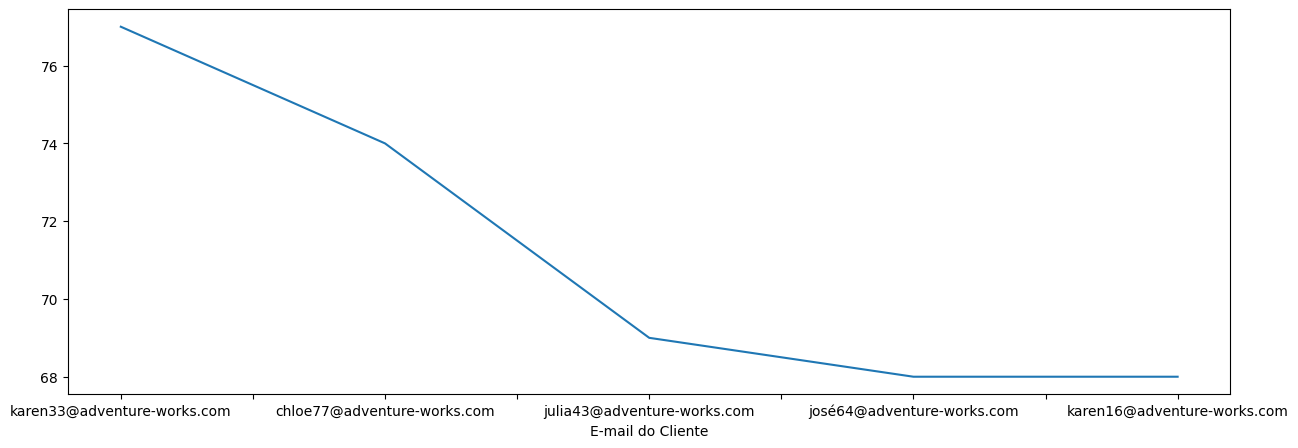

In [ ]:
#plotando um gráfico de barras para visualizar a frequencia com os primeiros :5 itens do df de requencia_compra_clientes
#frequencia_compra_clientes[:5].plot()

#plotando um gráfico de barras para visualizar a frequencia com os primeiros :5 itens do df de requencia_compra_clientes
#figsize - tupla com altura 5 e largura 5 - para visualização do grafico
frequencia_compra_clientes[:5].plot(figsize=(15, 5))